## Desafio - Módulo 2 - Machine Learning
##### **Com respotas do questionário**

## Objetivo:
* Análise exploratória dos dados (EDA - Exploratory Data Analysis).
* Preparação dos dados.
* Comparação e ajuste de modelos de classificação.


Dataset: https://archive.ics.uci.edu/ml/datasets/wine

**Wine Quality Data Set**<br>
Description

Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.


Attribute Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
- 01) Alcohol
- 02) Malic acid
- 03) Ash
- 04) Alcalinity of ash
- 05) Magnesium
- 06) Total phenols
- 07) Flavanoids
- 08) Nonflavanoid phenols
- 09) Proanthocyanins
- 10) Color intensity
- 11) Hue
- 12) OD280/OD315 of diluted wines
- 13) Proline


## Análise exploratória dos dados (EDA - Exploratory Data Analysis)

In [1]:
# importando as bibliotecas

import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#realizando a leitura do arquivo (dataset)
data = 'winequality-red.csv'
df = pd.read_csv(data, sep=';')

In [3]:
print(list(df.columns))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [4]:
#apresentando as 5 primeiras linhas do dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Pergunta 1
No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

- (12,1599).

- (1345,15).

- ***(1599,12).***

- (15,1345).

In [5]:
df.shape

(1599, 12)

In [6]:
print(f'Dimensão do dataframe - (1599 linhas(rows), 12 colunas(column)): {df.shape}')

Dimensão do dataframe - (1599 linhas(rows), 12 colunas(column)): (1599, 12)


#### Pergunta 2
Quantos tipos diferentes de dados existem no dataset do desafio?

- 17.

- ***2.***

- 12.

- 3.

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
print(f'Tipos de dados existente no dataset: \n{df.dtypes.value_counts()}')

Tipos de dados existente no dataset: 
float64    11
int64       1
dtype: int64


#### Pergunta 3
Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?

- 5%.

- 15%.

- ***0%.***

- 12%.

In [9]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Confirmnando apenas com a coluna 'residual sugar'
df_mis = df['residual sugar']
mis_val_percent = 100 * df_mis.isnull().sum() / len(df_mis)
mis_val_percent

0.0

#### Pergunta 4
Qual é o desvio padrão para a variável "fixed acidity" ?

- 8.3

- 2.3

- ***1.7***

- 1.4

O **desvio padrão** é uma medida que indica a dispersão dos dados dentro de uma amostra com relação à média. Assim, quando se calcula o desvio padrão juntamente com a média de diferentes grupos, obtém-se mais informações para avaliar e diferenciar seus comportamentos.

In [12]:
df_std = df['fixed acidity']
df_std.std()

1.7410963181277006

#### Pergunta 5
Qual é a mediana para a variável "residual sugar"?

- 1.9

- 8.1

- 2.5

- ***2.2***

O termo **“mediana”** refere-se a “meio”. Dado um conjunto de informações numéricas, o valor central corresponde à mediana desse conjunto. Dessa forma, é importante que esses valores sejam colocados em ordem, seja crescente ou decrescente. Se houver uma quantidade ímpar de valores numéricos, a mediana será o valor central do conjunto numérico. Se a quantidade de valores for um número par, devemos fazer uma média aritmética dos dois números centrais, e esse resultado será o valor da mediana.

In [13]:
df_m = df['residual sugar']
df_m.median()

2.2

In [14]:
df_m.describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

#### Pergunta 6
Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:]

- ***Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".***

- Existe uma correlação positiva. Quanto maior o "fixed acidity, menor é o "pH".

- Existe uma correlação negativa. Quanto maior o "fixed acidity, maior é o "pH".

- Existe uma correlação negativa. Quanto menor o "fixed acidity, menor é o "pH".

Os **coeficientes de correlação** são métodos estatísticos para se medir as relações entre variáveis e o que elas representam.

O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.

O coeficiente de correlação de Pearson (r) ou coeficiente de correlação
produto-momento ou o r de Pearson mede o grau da correlação linear entre
duas variáveis quantitativas. É um índice adimensional com valores situados
ente -1,0 e 1.0 inclusive, que reflete a intensidade de uma relação linear entre
dois conjuntos de dados. 

* r = 1 Significa uma correlação perfeita positiva entre as duas variáveis.
* r = -1 Significa uma correlação negativa perfeita entre as duas variáveis - Isto é,
se uma aumenta, a outra sempre diminui.
* r = 0 Significa que as duas variáveis não dependem linearmente uma da outra.
No entanto, pode existir uma outra dependência que seja "não linear". Assim, o
resultado r=0 deve ser investigado por outros meios. 



In [15]:
pearsoncorr = df[['fixed acidity', 'pH']].corr(method='pearson')
pearsoncorr

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


In [16]:
corr_matrix = df[['fixed acidity', 'pH']].corr(method='pearson')
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed acidity,pH
fixed acidity,1.00,-0.68
pH,-0.68,1.00


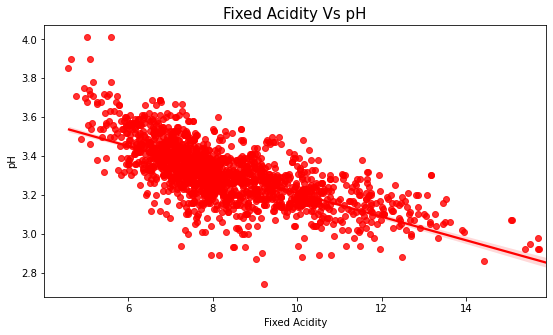

In [17]:
plt.figure(figsize=(9,5))
sns.regplot(x='fixed acidity', y='pH', data=df, color='r', x_jitter=0.2)
plt.xlabel("Fixed Acidity")
plt.ylabel("pH")
plt.title("Fixed Acidity Vs pH", fontsize=15)
plt.show()

Sendo assim nesse caso quando o valor de uma variável aumenta o da outra diminui. Isso é o que é chamado de correlação negativa ou inversa, ou seja Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".

#### Pergunta 7
Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol":

- Para analisar correlação é necessário que o coeficiente seja superior a 1.

- ***Quanto maior o teor alcoolico (alcohol), maior é a qualidade do vinho (quality).***

- Não é possível dizer nada sobre a correlação entre as vairáveis.

- Quanto maior o teor alcoolico (alcohol), menor é a qualidade do vinho (quality).

In [18]:
pearsoncorr = df[['quality', 'alcohol']].corr(method='pearson')
pearsoncorr

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


In [19]:
corr_matrix = df[['quality', 'alcohol']].corr(method='pearson')
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,quality,alcohol
quality,1.00,0.48
alcohol,0.48,1.00


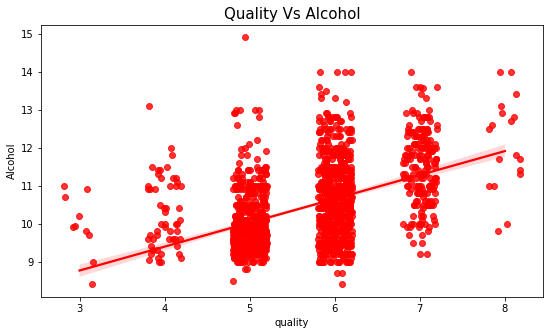

In [20]:
plt.figure(figsize=(9,5))
sns.regplot(x='quality', y='alcohol', data=df, x_jitter=0.2, color='r')
plt.xlabel("quality")
plt.ylabel("Alcohol")
plt.title("Quality Vs Alcohol", fontsize=15)
plt.show()

#### Pergunta 8
Quantas instâncias existem para a qualidade do vinho igual a 5?

- 345

- ***681***

- 53

- 638

In [21]:
df_quality = df[['quality']]
df_quality.eq(5).sum()

quality    681
dtype: int64

In [22]:
counts = df['quality'].value_counts().to_frame()
counts

,quality
5,681
6,638
7,199
4,53
8,18
3,10


## Preparação dos dados.

In [23]:
# Fatiamento do dataset para normalização, ou seja separa as variáveis preditoras e alvo para posteriormente fazer o treinamento
X = df.iloc[:,:-1] # Todas as outras
y = df.iloc[:,-1]  # Apenas variável 'quality'

iloc is for integer based df.iloc[0, 0] </br>
loc is primarily label based df.loc[0, 'quality']

#### Pergunta 9
Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

- 1

- ***0***

- 15.2

- 4,6

O objetivo da **normalização** é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Para o aprendizado de máquina, nem todos os conjuntos de dados requerem normalização. Esse método é necessário apenas quando os parâmetros tiverem intervalos muito diferentes.

### Normalização

In [24]:
# normalizzação do dataset, necessário para que os algoritmos possam ter um comportamento mais "previsível"
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler() # cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
array_scaler = min_max_scaler.fit_transform(X)  # aplica a escala
col = X.columns

In [25]:
# DataFrame após a nromalização
df_normalizado = pd.DataFrame(array_scaler, columns=col)
df_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [26]:
df_normalizado['fixed acidity'].min()

0.0

## Comparação e ajuste de modelos de classificação.

### KNN - K-Nearest Neighbor

#### Pergunta 10
Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurária para o KNN?

- ***0,56***

- 1,2

- 0,15

- 0,89

In [27]:
from sklearn.model_selection import train_test_split
# df_normalizado - são as variáveis independentes
# y - são as variáveis pendentes
X_train, X_test, y_train, y_test = train_test_split(df_normalizado, y, test_size=0.3, random_state=1)

In [28]:
# Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 

# Definindo o valor de visinhos, o 5 significa os 5 vizinhos mais próximos
clf_KNN = KNeighborsClassifier(n_neighbors=5)  

# Treinando o modelo
clf_KNN.fit(X_train, y_train)
y_knn_pred = clf_KNN.predict(X_test)

# Acurácia do modelo KNN
acc_knn = accuracy_score(y_test, y_knn_pred)
print(f'Acurácia KNN: {acc_knn}')

Acurácia KNN: 0.5645833333333333


### Decision Tree

#### Pergunta 11
Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste como mostrado, anteriormente. Qual é o valor da acurácia?

- 0.80

- -0.58

- ***0.58***

- -0.80

In [29]:
# Importando o modelo Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier()

# Treinando o modelo
clf_arvore.fit(X_train, y_train)
y_arvore_pred = clf_arvore.predict(X_test)

# Acurácia do modelo Decision Tree
acc_tree = accuracy_score(y_test, y_arvore_pred)
print(f'Acurácia Decision Tree: {acc_tree}')

Acurácia Decision Tree: 0.6041666666666666


### Random Forest

#### Pergunta 12
Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores treinamento e teste, qual é o valor da acurácia?

- 0,40

- 0,30

- ***0,68***

- 1,00

In [30]:
# Importando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

# Treinando o modelo
clf_floresta.fit(X_train, y_train)
y_floresta_pred = clf_floresta.predict(X_test)

# Acurácia do modelo Random Forest
acc_floresta = accuracy_score(y_test, y_floresta_pred)
print(f'Acurácia Random Forest: {acc_floresta}')

Acurácia Random Forest: 0.6791666666666667


### SVM - Support Vector Machine

#### Pergunta 13
Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor de acurácia obtido?

- 0,72

- 0,36

- 0,15

- ***0,59***

In [31]:
# Importando o modelo SVM
from sklearn.svm import SVC

clf_svm = SVC(gamma='auto', kernel='rbf')

# Treinando o modelo
clf_svm.fit(X_train, y_train)
y_svm_pred = clf_svm.predict(X_test)

# Acurácia do modelo Random Forest
acc_svm = accuracy_score(y_test, y_svm_pred)
print(f'Acurácia SVM: {acc_svm}')

Acurácia SVM: 0.5854166666666667


### MLP - Multilayer Perceptron

#### Pergunta 14
Apicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, qual é a acurácia do modelo?

- ***0,60***

- 0,90

- 0,25

- 0,30

In [32]:
# Importando o modelo MLP
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

# Treinando o modelo
clf_mlp.fit(X_train, y_train)
y_mlp_pred = clf_mlp.predict(X_test)

# Acurácia do modelo MLP
acc_mlp = accuracy_score(y_test, y_mlp_pred)
print(f'Acurácia MLP: {acc_mlp}')

Acurácia MLP: 0.6


#### Pergunta 15
Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?

- ***0,80***

- 0,50

- 0,68

- 0,60

In [33]:
# Modificando o dataset para um sistema binário
df_modify = df.copy()

In [34]:
# Fazendo o fatiamento do dataset
X_mod = df_modify.iloc[:,:11]
y_mod = df_modify.quality

In [35]:
# Criando um dicionário a partir das variáveis
Y_mod = y_mod.replace({6:1, 7:1, 8:1, 5:0, 4:0, 3:0})

In [36]:
Y_mod

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

In [37]:
# normalizzação do dataset, necessário para que os algoritmos possam ter um comportamento mais "previsível"
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler() # cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
array_scaler = min_max_scaler.fit_transform(X_mod) # aplica a escala

In [38]:
# DataFrame após a nromalização
df_mod = pd.DataFrame(array_scaler, columns = X_mod.columns)
df_mod.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [39]:
from sklearn.model_selection import train_test_split
# df_mod - são as variáveis independentes
# Y_mod - são as variáveis pendentes
X_train, X_test, y_train, y_test = train_test_split(df_mod, Y_mod, test_size=0.3, random_state=1)

In [40]:
# Importando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_floresta_mod = RandomForestClassifier(max_depth=10, random_state=1)

# Treinando o modelo
clf_floresta_mod.fit(X_train, y_train)
y_floresta_mod_pred = clf_floresta_mod.predict(X_test)

# Acurácia do modelo Random Forest
acc_floresta_mod = accuracy_score(y_test, y_floresta_mod_pred)
print(f'Acurácia Random Forest Modificada: {acc_floresta_mod}')

Acurácia Random Forest Modificada: 0.8041666666666667
